In [1]:
import wget
import os 

try: 
    os.mkdir('PROJ1') 
except OSError as error: 
    print(error)

wget.download('https://www.gw-openscience.org/eventapi/html/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5', 'PROJ1')

[Errno 17] File exists: 'PROJ1'
 99% [................................................. ] 130007040 / 130158262

ContentTooShortError: <urlopen error retrieval incomplete: got only 130003704 out of 130158262 bytes>

<Figure size 640x480 with 0 Axes>

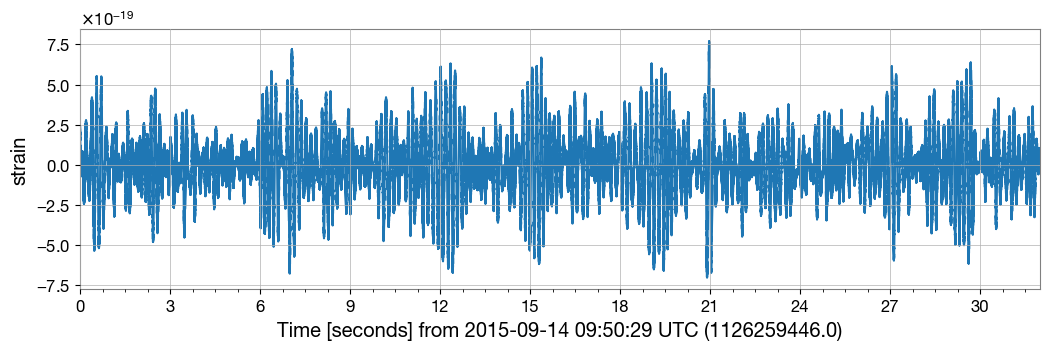

In [2]:
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries

fn = ('/Users/cameronsouza/Desktop/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5')
tevent = 1126259462.422 
evtname = 'GW150914' 
detector = 'H1' 

strain = TimeSeries.read(fn, format='hdf5.gwosc')
center = int(tevent)
strain = strain.crop(center-16, center+16)

plt.figure()
strain.plot()
plt.ylabel('strain')
plt.show()

In [3]:
from datetime import datetime

gw_observation_timestamp = 1126259462  
gw_observation_datetime = datetime.utcfromtimestamp(gw_observation_timestamp)
day_of_week_int = gw_observation_datetime.weekday()

days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_of_week_name = days_of_week[day_of_week_int]

print(f"The GW observation was made on a {day_of_week_name}.")

The GW observation was made on a Friday.


<Figure size 640x480 with 0 Axes>

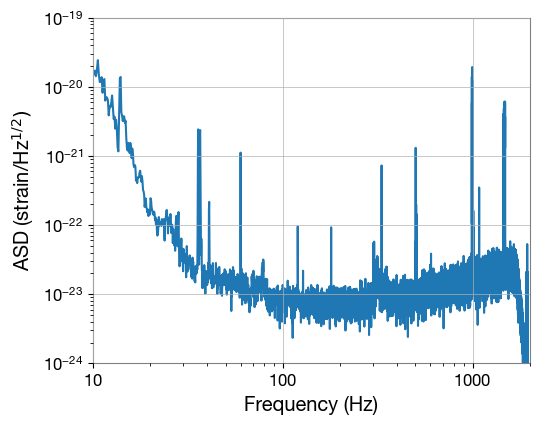

In [4]:
asd = strain.asd(fftlength=8)

plt.clf()
asd.plot()
plt.xlim(10, 2000)
plt.ylim(1e-24, 1e-19)
plt.ylabel('ASD (strain/Hz$^{1/2})$')
plt.xlabel('Frequency (Hz)')
plt.show()

<Figure size 640x480 with 0 Axes>

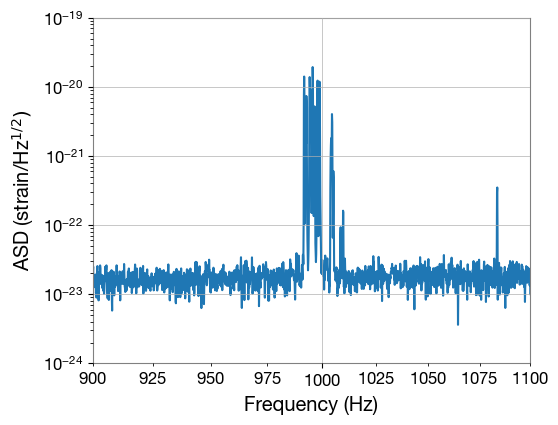

In [5]:
asd = strain.asd(fftlength=8)

x_min = 900
x_max = 1100
y_min = 1e-24
y_max = 1e-19

plt.clf()
asd.plot()
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.ylabel('ASD (strain/Hz$^{1/2})$')
plt.xlabel('Frequency (Hz)')
plt.show()

<Figure size 1000x600 with 0 Axes>

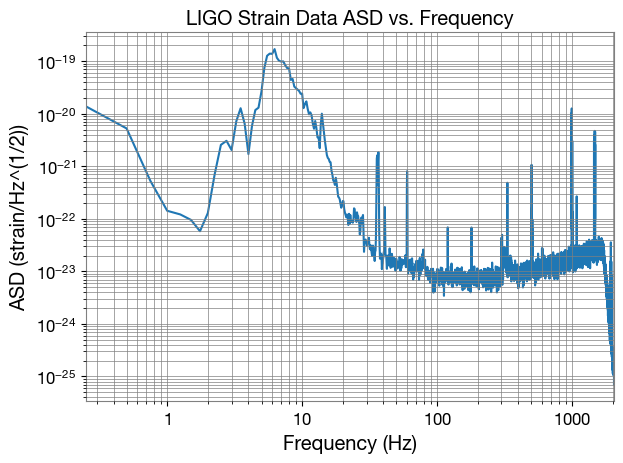

In [6]:
asd = strain.asd(fftlength=4, method='median')

plt.figure(figsize=(10, 6))
asd.plot()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('ASD (strain/Hz^(1/2))')
plt.title('LIGO Strain Data ASD vs. Frequency')
plt.grid(True, which='both', ls='-', color='gray')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

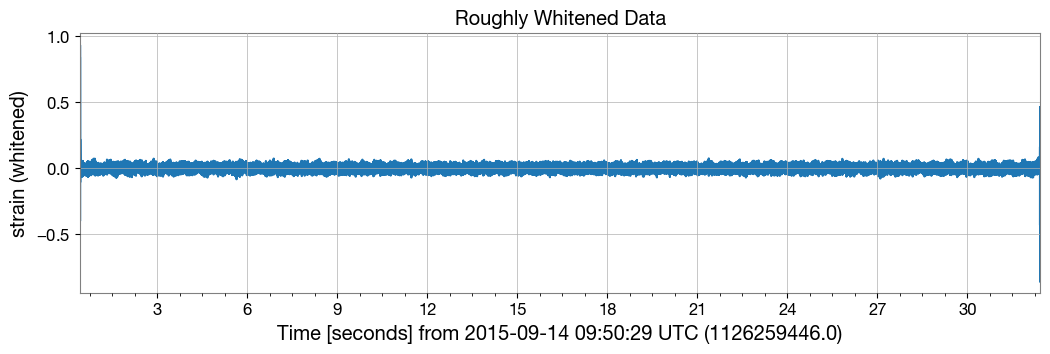

In [7]:
import numpy as np

def rough_whitener(strain_data, crop_window=30): 
  asd_data = strain_data.asd()
  fft_data = strain_data.fft()
  whitened = np.fft.irfft(np.abs(1/asd_data)*fft_data)
  return whitened

whitened_timeseries = TimeSeries(rough_whitener(strain))
whitened_timeseries.t0 = tevent - 16 
whitened_timeseries.dt = 1/4096 
plt.clf()
whitened_timeseries[0:-1].plot()
plt.ylabel('strain (whitened)')
plt.title('Roughly Whitened Data')
plt.show()

<Figure size 640x480 with 0 Axes>

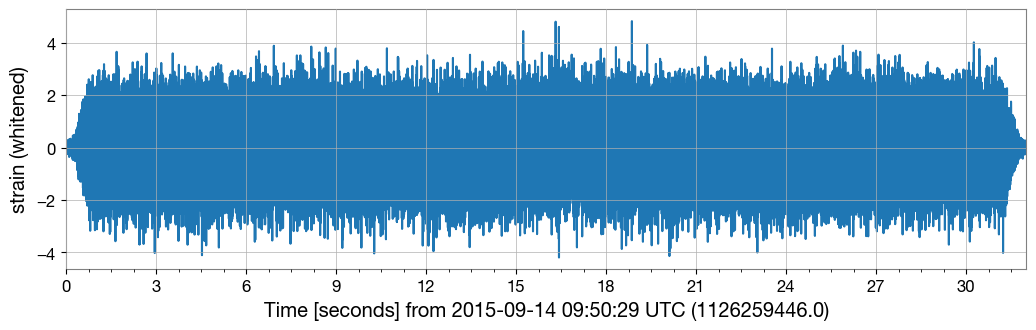

In [8]:
white_data = strain.whiten() 
plt.clf()
white_data.plot()
plt.ylabel('strain (whitened)')
plt.show()

In [14]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

dt = 1  
hq = strain.q_transform(outseg=(tevent - dt, tevent + dt))

plt.clf()
fig = hq.plot()
ax = fig.gca()
fig.colorbar(label="Normalised energy")
ax.grid(False)
plt.xlim(tevent - 0.5, tevent + 0.5)
plt.ylim(0, 1000)
plt.ylabel('Frequency (Hz)')
plt.title('Q-Transform')
plt.show()
#externalplot

<Figure size 640x480 with 0 Axes>

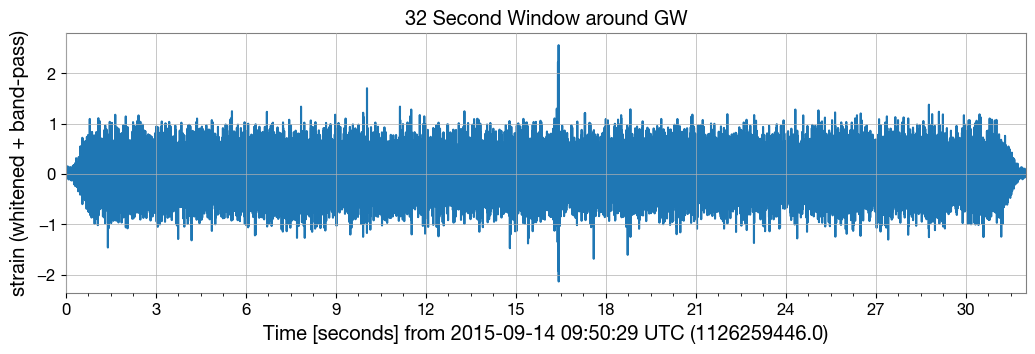

<Figure size 640x480 with 0 Axes>

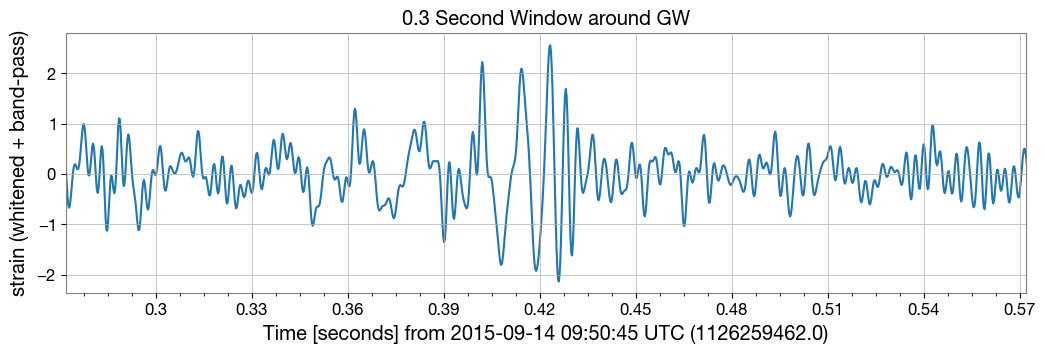

<Figure size 640x480 with 0 Axes>

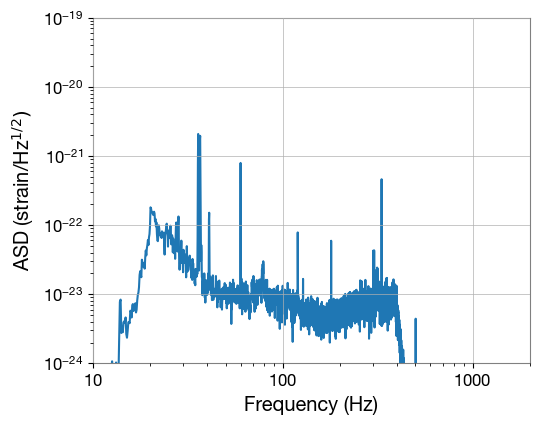

<TimeSeries([0.01532747, 0.0232103 , 0.02870188, ..., 0.02302322,
             0.01527461, 0.00560826]
            unit=Unit(dimensionless),
            t0=<Quantity 1.12625945e+09 s>,
            dt=<Quantity 0.00024414 s>,
            name='Strain',
            channel=None)>

In [9]:
import matplotlib.pyplot as plt

def bandpass(white_data, bandpass_low, bandpass_high): 
    white_data_bp = white_data.bandpass(bandpass_low, bandpass_high)

    plt.clf()
    white_data_bp.plot()
    plt.ylabel('strain (whitened + band-pass)')
    plt.title('32 Second Window around GW')
    plt.show()

    plt.clf()
    white_data_bp.plot()
    plt.ylabel('strain (whitened + band-pass)')
    plt.xlim(tevent - 0.15, tevent + 0.15)
    plt.title('0.3 Second Window around GW')
    plt.show()

    strain_bandpass = strain.bandpass(bandpass_low, bandpass_high) 
    asd = strain_bandpass.asd(fftlength=8)
    plt.clf()
    asd.plot()
    plt.xlim(10, 2000)
    plt.ylim(1e-24, 1e-19)
    plt.ylabel('ASD (strain/Hz$^{1/2})$')
    plt.xlabel('Frequency (Hz)')
    plt.show()

    return white_data_bp

bandpass_low, bandpass_high = [20, 400] 
bandpass(white_data, bandpass_low, bandpass_high)


<Figure size 640x480 with 0 Axes>

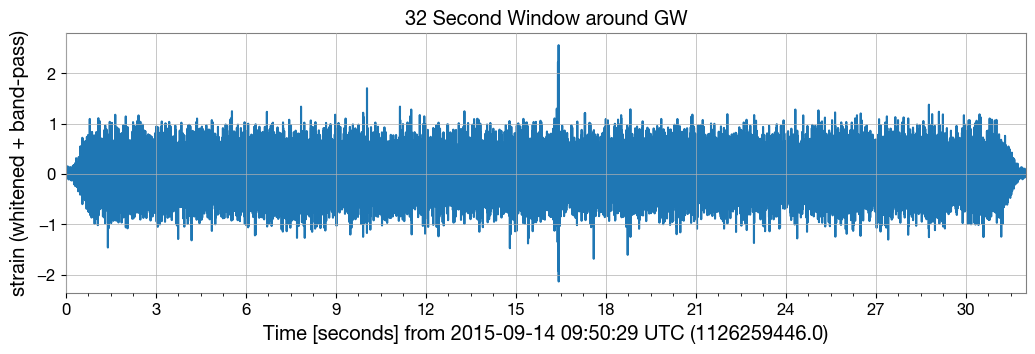

<Figure size 640x480 with 0 Axes>

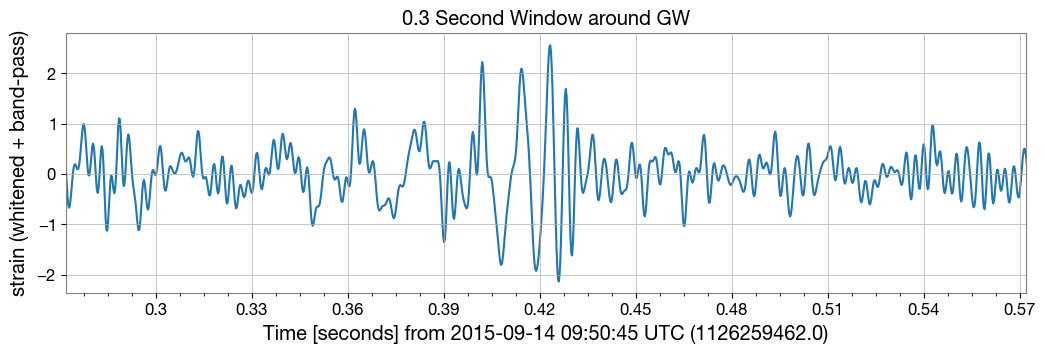

<Figure size 640x480 with 0 Axes>

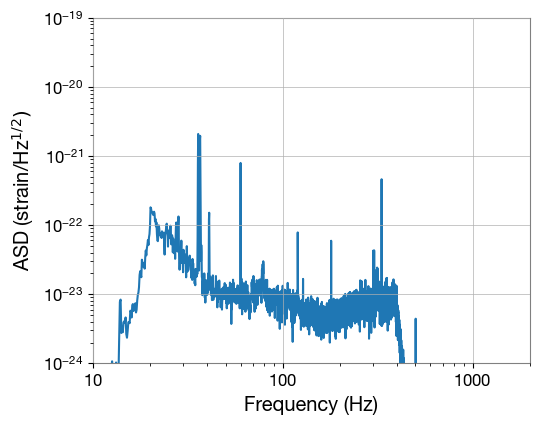

<TimeSeries([0.01532747, 0.0232103 , 0.02870188, ..., 0.02302322,
             0.01527461, 0.00560826]
            unit=Unit(dimensionless),
            t0=<Quantity 1.12625945e+09 s>,
            dt=<Quantity 0.00024414 s>,
            name='Strain',
            channel=None)>

In [10]:
bandpass_low = 20  
bandpass_high = 400 

bandpass(white_data, bandpass_low, bandpass_high)


In [11]:
def gwfreq(iT, iM, iT0, cutoff=2e-3):
    
    const = (256/5) * (iM * 1.989e30) ** (5/3) * (6.67430e-11 / (299792458**3))
    idelta_T = iT0 - iT
    output = const * np.power(np.maximum(idelta_T, cutoff), -3/8)
    return output

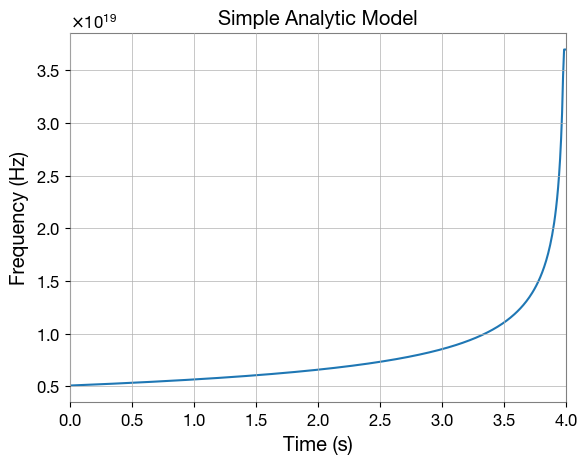

<Figure size 640x480 with 0 Axes>

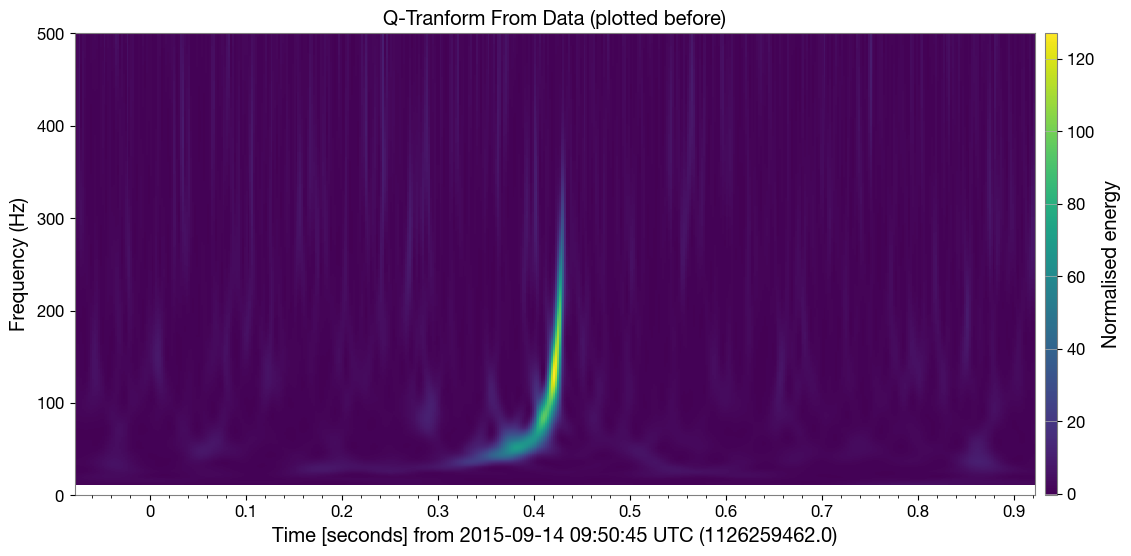

In [12]:
times = np.linspace(0, 4., 500)

freq = gwfreq(iT=times, iM=25, iT0=4, cutoff=2e-2)

plt.clf()
plt.plot(times, freq)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Simple Analytic Model')
plt.xlim(0, 4)
plt.show()

dt = 1  
hq = strain.q_transform(outseg=(tevent-dt, tevent+dt))

plt.clf()
fig = hq.plot()
ax = fig.gca()
fig.colorbar(label="Normalised energy")
ax.grid(False)
plt.xlim(tevent-0.5, tevent+0.5)
plt.ylim(0, 500)
plt.ylabel('Frequency (Hz)')
plt.title('Q-Tranform From Data (plotted before)')
plt.show()

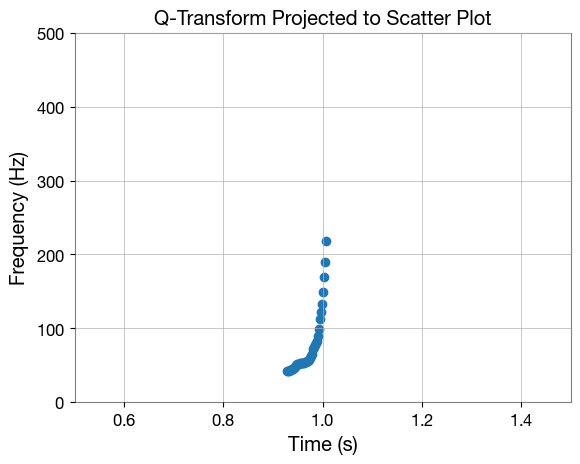

In [13]:
def project_spectrogram(hq, threshold=30): 

  projected_spec_times = []
  projected_spec_freq = []

  offset = hq.t0
  hq.times -= hq.t0
  hq_times = hq.times.value
  hq_freq = hq.frequencies.value
  hq_values = hq.value

  for x_pixel in range(hq.shape[0]): 
      for y_pixel in range(hq.shape[1]):
          if hq_values[x_pixel, y_pixel] > threshold: 
            projected_spec_times.append(hq_times[x_pixel])
            projected_spec_freq.append(hq_freq[y_pixel])

  fixed_projection_times = []
  fixed_projection_freq = []
  pool = []
  for i in range(len(projected_spec_times)-1): 
    if projected_spec_times[i] == projected_spec_times[i+1]:
      pool.append(projected_spec_freq[i])
    else: 
      fixed_projection_times.append(projected_spec_times[i])
      fixed_projection_freq.append(np.mean(pool))
      pool = []
  return fixed_projection_times, fixed_projection_freq

projected_spec_times, projected_spec_freq = project_spectrogram(hq)

plt.figure()
plt.scatter(projected_spec_times, projected_spec_freq)
plt.xlim((0.5, 1.5))
plt.ylim((0, 500))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Q-Transform Projected to Scatter Plot')
plt.show()

[[Model]]
    Model(gwfreq_dif)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 100
    # variables        = 3
    chi-square         = 1.000e-248
    reduced chi-square = 0.00000000
    Akaike info crit   = -57558.6273
    Bayesian info crit = -57550.8118
    R-squared          = 1.00000000
##  Warning: uncertainties could not be estimated:
    iM:      at initial value
    iT0:     at initial value
    cutoff:  at initial value
[[Variables]]
    iM:      25.0000000 +/- 0.00000000 (0.00%) (init = 25)
    iT0:     1.00000000 +/- 0.00000000 (0.00%) (init = 1)
    cutoff:  0.02000000 +/- 0.00000000 (0.00%) (init = 0.02)


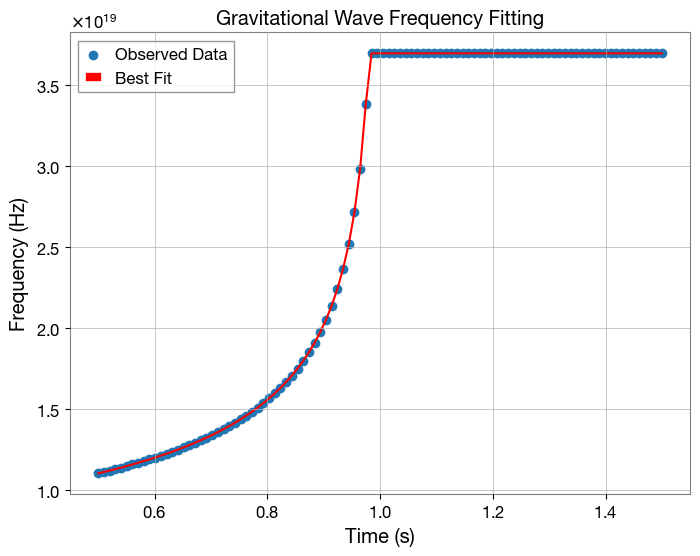

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import lmfit

def gwfreq(iT, iM, iT0, cutoff=2e-3):
    const = (256/5) * (iM * 1.989e30) ** (5/3) * (6.67430e-11 / (299792458**3))
    idelta_T = iT0 - iT
    return const * np.power(np.maximum(idelta_T, cutoff), -3/8)

def gwfreq_dif(x, iM, iT0, cutoff):
    return gwfreq(x, iM, iT0, cutoff)

model = lmfit.Model(gwfreq_dif)

params = model.make_params(iM=25, iT0=1, cutoff=2e-2)

projected_spec_times = np.linspace(0.5, 1.5, 100)
projected_spec_freq = gwfreq(projected_spec_times, 25, 1, 2e-2) + np.random.normal(0, 10, 100)

unc = np.full(len(projected_spec_times), 10)  
result = model.fit(projected_spec_freq, params, x=projected_spec_times, weights=1/unc)

print(result.fit_report())

plt.figure(figsize=(8, 6))
plt.scatter(projected_spec_times, projected_spec_freq, label='Observed Data')
plt.plot(projected_spec_times, result.best_fit, 'r-', label='Best Fit')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Gravitational Wave Frequency Fitting')
plt.legend()
plt.show()



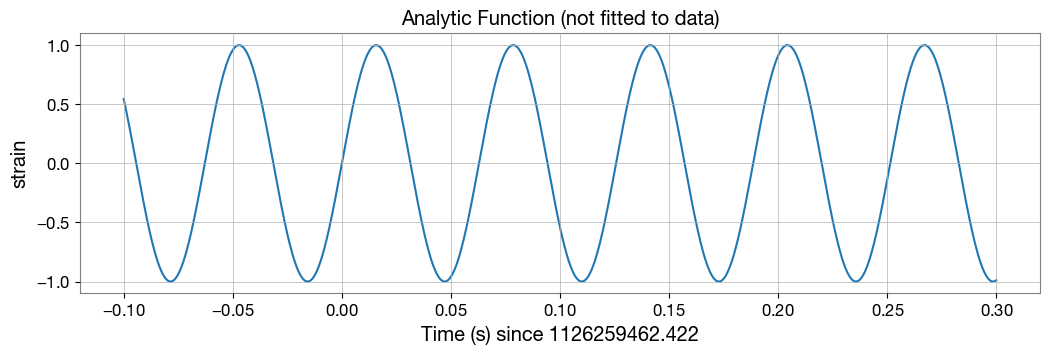

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 1228
    # variables        = 6
    chi-square         = 3054.34407
    reduced chi-square = 2.49946323
    Akaike info crit   = 1130.92662
    Bayesian info crit = 1161.60548
##  Warning: uncertainties could not be estimated:
    Mc:      at initial value
    t0:      at initial value
    cutoff:  at initial value
    C:       at initial value
[[Variables]]
    Mc:      25.0000000 (init = 25)
    t0:      0.17000000 (init = 0.17)
    cutoff:  0.00200000 (init = 0.002)
    C:       1.0000e-12 (init = 1e-12)
    phi:     0.00000000 (init = 0)
    tau:     0.00000000 (init = 0)


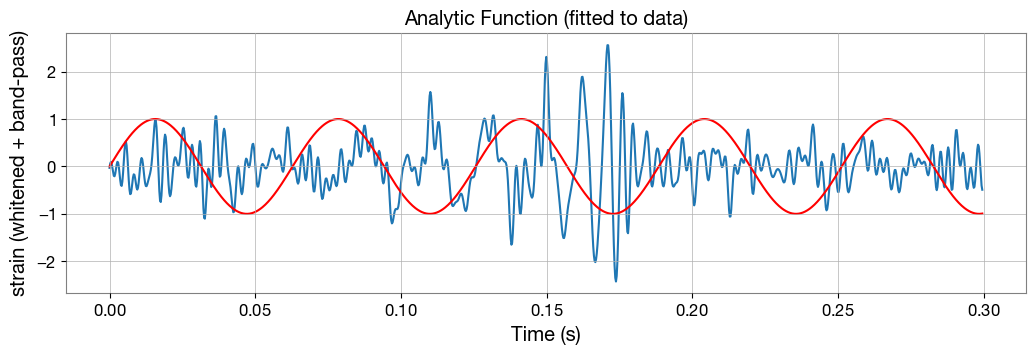

In [31]:
white_data_bp = white_data.bandpass(bandpass_low, bandpass_high)
from lmfit import minimize, Parameters, fit_report

def osc_dif(params, x, data, eps):
  iM=params["Mc"]
  iT0=params["t0"]
  cutoff=params['cutoff']
  norm=params["C"]
  phi=params["phi"]
  tau=params["tau"]

  val=osc(x, iM, iT0, cutoff, norm, phi, tau)
  return (val-data)/eps

def plot_fit_function_not_fitted(function):
  times = np.linspace(-0.1, 0.3, 1000)
  freq = function(times, 30, 0.18, 1e-2, 1, 0, 0)
  plt.figure(figsize=(12, 4))
  plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.2)
  plt.plot(times, freq)
  plt.xlabel('Time (s) since '+str(tevent))
  plt.ylabel('strain')
  plt.title('Analytic Function (not fitted to data)')
  plt.show()


def plot_fit_function_fitted(function):
  sample_times = white_data_bp.times.value
  sample_data = white_data_bp.value
  indxt = np.where((sample_times >= (tevent-0.17)) & (sample_times < (tevent+0.13)))
  x = sample_times[indxt]
  x = x-x[0]
  white_data_bp_zoom = sample_data[indxt]

  plt.figure(figsize=(12, 4))
  plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.2)
  plt.plot(x, white_data_bp_zoom)
  plt.xlabel('Time (s)')
  plt.ylabel('strain (whitened + band-pass)')

  model = lmfit.Model(osc)
  p = model.make_params()
  p['Mc'].set(25)   
  p['t0'].set(0.17)  
  p['cutoff'].set(2e-3)
  p['C'].set(1e-12)      
  p['phi'].set(0)  
  p['tau'].set(0)    
  unc = np.full(len(white_data_bp_zoom),np.std(white_data_bp_zoom))
  out = minimize(osc_dif, params=p, args=(x, white_data_bp_zoom, unc))
  print(fit_report(out))
  plt.plot(x, model.eval(params=out.params,t=x),'r',label='best fit')
  plt.title('Analytic Function (fitted to data)')
  plt.show()

def osc(t, Mc, t0, cutoff, C, phi, tau):
    val = np.sin(100*t)
    return val

plot_fit_function_not_fitted(osc)
plot_fit_function_fitted(osc)

In [35]:
best_fit_iM = result.params['iM'].value
best_fit_iM_rounded = round(best_fit_iM)
print(best_fit_iM)

25.0
